In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import Word

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
import html

#Acquiring Dataset

The data used in this module is the <a href="https://archive.ics.uci.edu/ml/datasets/Youtube+Spam+Collection">YouTube Spam Collection Data Set.</a>

In [3]:
df = pd.concat([pd.read_csv("Youtube01-Psy.csv"),
               pd.read_csv("Youtube02-KatyPerry.csv"),
               pd.read_csv("Youtube03-LMFAO.csv"),
               pd.read_csv("Youtube04-Eminem.csv"),
               pd.read_csv("Youtube05-Shakira.csv")])
df = df[["CONTENT", "CLASS"]]
df = df.rename(columns = {'CONTENT': 'Comment', 'CLASS': 'Spam'}, inplace = False)
df

,Comment,Spam
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
365,I love this song because we sing it at Camp al...,0
366,I love this song for two reasons: 1.it is abou...,0
367,wow,0
368,Shakira u are so wiredo,0


#Data Visualization

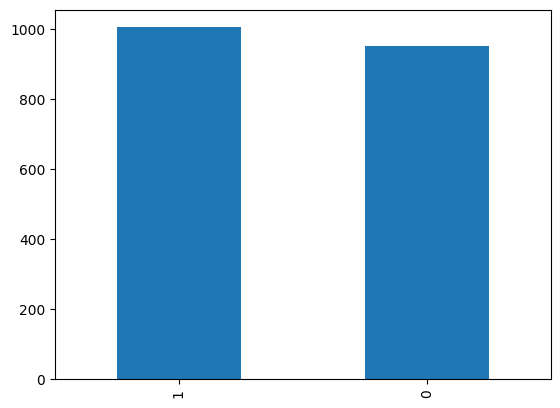

In [7]:
df.Spam.value_counts().plot.bar()
plt.show()

In [8]:
print(df.Spam.value_counts())

1    1005
0     951
Name: Spam, dtype: int64


#Data Preprocessing

In [ ]:
def de_repeat(text):                                                            #removing repeated characters in words (changes words like booooook into book)
  pattern = re.compile(r"(.)\1{2,}")
  return pattern.sub(r"\1\1", text)

In [ ]:
def remove_html(raw_comment):
  raw_comment = re.sub(r'<br>', " ", raw_comment)
  raw_comment = re.sub(r'<b>', " ", raw_comment)
  raw_comment = re.sub(r'</b>', " ", raw_comment)
  raw_comment = html.unescape(raw_comment)
  raw_comment = re.sub(r'\n', "", raw_comment)
  raw_comment = re.sub(r'\t', "", raw_comment)
  raw_comment = re.sub(r'<[^<]+?>', '', raw_comment)
  return raw_comment

In [ ]:
df['Comment'] = df['Comment'].apply(remove_html)
df['Comment'] = df['Comment'].str.replace("@[A-Za-z0-9_]+", "")                       #The text in the datasets are from tweets that contain links, #hashtags and @mentions
df['Comment'] = df['Comment'].str.replace("#[A-Za-z0-9_]+", "")                       #These have to be removed
df['Comment'] = df['Comment'].str.replace("^https?:\/\/.*[\r\n]*", "")
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split())) #changing text to lowercase
df['Comment'] = df['Comment'].str.replace('[^\w\s]',' ')                              #removing punctuation and digits
df['Comment'] = df['Comment'].str.replace('[0-9]', ' ')
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))        #removing stopwords
df['Comment'] = df['Comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))       #lemmatizing words
df['Comment'] = df['Comment'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))  

#Training and evaluation

In [ ]:
y = df.Spam.values
X_train, X_test, y_train, y_test = train_test_split(df.Comment.values, y, stratify=y, random_state=42, test_size=0.3, shuffle=True)

In [ ]:
count_vect = CountVectorizer(analyzer='word')                                   #vectorizing words using count vectorizer
count_vect.fit(df['Comment'])
X_train_count =  count_vect.transform(X_train)
X_test_count =  count_vect.transform(X_test)

In [ ]:
model = SGDClassifier(alpha=0.002)        #lsvm gave highest accuracy among the models tested.
model.fit(X_train_count, y_train)
y_pred = model.predict(X_test_count)
print('Lsvm accuracy %s' % accuracy_score(y_pred, y_test))
print('Lsvm precision %s' % precision_score(y_pred, y_test))
print('Lsvm recall %s' % recall_score(y_pred, y_test))
print('Lsvm f1 score %s' % f1_score(y_pred, y_test))

Lsvm accuracy 0.9131175468483816
Lsvm precision 0.8609271523178808
Lsvm recall 0.966542750929368
Lsvm f1 score 0.9106830122591943
